# Finite difference method

In [2]:
import numpy as np
from numpy import cos, sin, tan, exp

import matplotlib.pyplot as plt

Basic idea. 본래 미분은 무한히 작은 h를 사용한다. 수치적으로는 이것이 불가능하므로, 유한한(Finite) 크기의 h(Difference)를 사용해 미분을 근사한다.

# 1. Euler's method
$\frac{dx}{dx} = f(x(t), t)$

for example, $\frac{dx}{dt} = t cos(x) + t^2$

So, initial condition($x(t_0)$) given, we know $\frac{dx}{dt}|_{t_0}$.

approximately, $\frac{dx}{dt} \approx \frac{x(t+h) - x(t)}{h}$. Hence

$
x(t_0+h) \approx x(t_0) + h( f(x(t_0), t_0)).
$

by repeat this process, we can solve ODE.

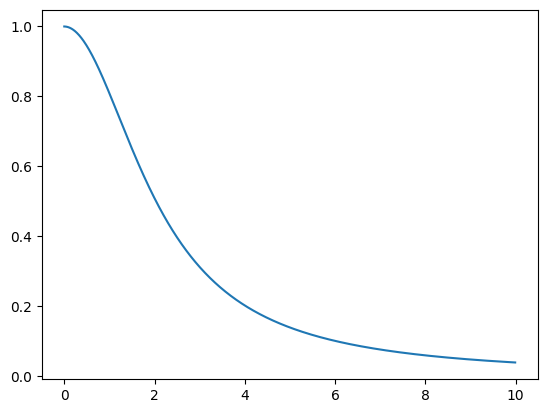

In [10]:
"""
1. 
u'(x) = ( u(x+h) - u(x) ) / h 
"""

# initial condition
t_0 = 0
x_0 = 1
h = 0.01 # time step
T = 10 # period
# differential equation
x_prime = lambda x, t: t*cos(x) - t

# solver
x = x_0
xs = []
ts = np.arange(t_0, t_0+T, h)
for t in ts:
    m = x_prime(x, t)
    x += m*h
    xs.append(x)

plt.plot(ts, xs)
plt.show()

# 2. Midpoint method

AKA modified Euler method. there are two version of this method: explicit and implicit method.

benefits and disadvantages are significiant. explicit method is fast but not stable and accurate. In contrast implicit method is stable and accurate but slow.

Expression
ODE want to solve: $x'(t) = f(x(t), t)$

for small h, we can approximating x'(t) as below.
$x'(t) \approx \frac{x(t+h) - x(t)}{h} $

BUT, right hand side is more suitable with $x'(t+h/2)$, not $x'(t)$.

$x'(t+h/2) \approx \frac{x(t+h) - x(t)}{h} $

So $x(t+h) \approx x(t) + h x'(t+h/2) \\ = x(t) + h f( x(t+h/2), t+h/2)$

we don't know value of $x(t+h/2) yet. It can be evaluated by Taylor expansion.

$x(t+h/2) \approx x(t) + h/2 x'(t) = x(t) +h/2 f(x(t), t)$

Finally, we got explicit midpoint method:

$x(t+h) \approx x(t) + h f( x(t) + h/2 f(x(t), t), t+h/2)$

Now, let's derive implicit method.

first, rewrite explicit method in more simple form.

$x(t+h) \approx x(t) + hk$ where $k=f( x(t) + h/2 f(x(t), t), t+h/2)$

while deriving this method, we assumed:

$x'(t+h/2) \approx \frac{1}{2} (x(t) + x(t+h)) \approx k$

and by given ODE:

$x'(t+h/2) = f(x(t+h/2), t+h/2) \approx f( x(t) + kh/2, t+h/2) = k$
$y(t+h) \approx y(t) + hk$

this is implicit midpoint method.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

"""
ODE: 
"""

# 3. Heun's method

Expression
ODE want to solve: $x'(t) = f(x(t), t)$

Using Euler's method, $\bar{x}(t+h) \approx x(t) + h f(x(t), t)$.

then $x'(t+h) = f(\bar{x}(t+h), t+h) \approx f( x(t) + h f(x(t), t), t+h)$.

we can get more accurate tangent via these $x'$s.

$S_{ideal}= \frac{1}{2} (S_{left} + S_{right})= \frac{1}{2} (x'(t)+x'(t+h))$

$x(t+h) \approx x(t) + h S_{ideal}$
$=x(t) + h (\frac{1}{2} (x'(t)+x'(t+h)))$

$x(t+h) \approx x(t) + h \frac{1}{2} ( f(x(t), t) + f(x(t) + h f(x(t), t), t+h))$

this is Heun's method.


# Linear Algebra

In [3]:
import numpy as np

a = np.array([1, 2]) # row vector
b = np.array([[1],
              [2]]) # column vector
A = np.array([[1, 1],
             [2, 3]]) # 2 by 2 matrix
B = np.array([[3, 1],
              [4, 1]]) # 2 by 2 matrix

# vector operations
# dot product
a_dot_b = np.dot(a, b)
# cross product

# matrix operations
# matrix multiplication
AB = np.dot(A, B)
# inverse matrix
A_inv = np.linalg.inv(A)
# check A_inv is inverse of A
np.allclose(np.dot(A_inv, A), np.eye(2)) # np.eye(N) is NxN identity matrix
# determinant
detA = np.linalg.det(A)
# traspose
AT = A.T
# eigenvalue, eigenvector
vals, vecs = np.linalg.eig(A)
# solve system of linear equations, Ax = b
b = np.array([5, 11])
x = np.linalg.solve(A, b)

# operation between vector and matrix
aA = np.dot(a, A) # result is row vector
Ab = np.dot(A, b) # result is column vector